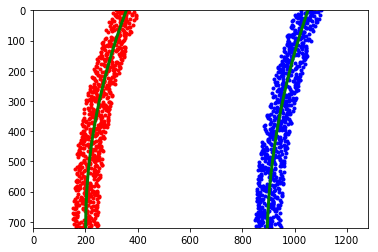

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import cv2

# used in Jupyter notebook from video
%matplotlib inline
# %matplotlib qt

"""
You're getting very close to a final result!

You have a thresholded image, where
you've estimated which pixels belong to the left and right lane lines
(shown in red and blue, respectively, below), and
you've fit a polynomial to those pixel positions.

Next we'll compute the radius of curvature of the fit.
"""

"""
In the last exercise, you located the lane line pixels,
used their x and y pixel positions to fit a second order polynomial curve :
f(y) = Ay**2 + By + C

NOTE : you're fitting for f(y), rather than f(x), because
the lane lines in the warped image are near vertical and
may have the same x value for more than one y value.
"""

"""
Radius of Curvature

The y values of your image increase from top to bottom, so if, for example,
you wanted to measure the radius of curvature closest to your vehicle,
you could evaluate the formula above at the y value corresponding to the
bottom of your image, or in Python, at yvalue = image.shape[0].

Here's an example in code to demonstrate this:
"""
# Generate some fake data to represent lane-line pixels
ploty = np.linspace(0, 719, num=720)  # to cover same y-range as image
quadratic_coeff = 3e-4  # arbitrary quadratic coefficient
# For each y position generate random x position within +/-50 pix
# of the line base position in each case (x=200 for left, and x=900 for right)
leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51)
                              for y in ploty])
rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51)
                                for y in ploty])

leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
rightx = rightx[::-1]  # Reverse to match top-to-bottom in y


# Fit a second order polynomial to pixel positions in each fake lane line
left_fit = np.polyfit(ploty, leftx, 2)
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fit = np.polyfit(ploty, rightx, 2)
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# Plot up the fake data
mark_size = 3
plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
plt.xlim(0, 1280)
plt.ylim(0, 720)
plt.plot(left_fitx, ploty, color='green', linewidth=3)
plt.plot(right_fitx, ploty, color='green', linewidth=3)
plt.gca().invert_yaxis()  # to visualize as we do the images


In [3]:
"""
Now we have polynomial fits and we can calculate the radius of curvature as follows:
"""
# Define y-value where we want radius of curvature
# I'll choose the maximum y-value, corresponding to the bottom of the image
y_eval = np.max(ploty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)
# Example values: 1926.74 1908.48

1635.80112028 1980.43528777


In [4]:
"""
But now we need to stop and think...
We've calculated the radius of curvature based on pixel values, so
the radius we are reporting is in pixel space,
which is not the same as real world space.

So we actually need to repeat this calculation after converting our x and y values to real world space.

This involves measuring how long and wide the section of lane is that we're projecting in our warped image.

We could do this in detail by measuring out the physical lane in the field of view of the camera, but
for this project, you can assume that if you're projecting a section of lane similar to the images above,
the lane is about 30 meters long and 3.7 meters wide.

Or, if you prefer to derive a conversion from pixel space to world space in your own images,
compare your images with U.S. regulations that require a minimum lane width of 12 feet or 3.7 meters, and
the dashed lane lines are 10 feet or 3 meters long each.

So here's a way to repeat the calculation of radius of curvature after correcting for scale in x and y:
"""
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m

537.27172886 m 649.361976846 m
